<a href="https://colab.research.google.com/github/yms0606/ML-study/blob/main/%EB%8D%B0%EC%9D%B4%EC%BD%98_1%EB%93%B1_solution/KBO_OPS_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KBO 타자 OPS 예측 경진대회

* Regular_Season_Batter.csv: 역대 활약한 타자들의 정규시즌 성적을 포함한 기본 정보
* Regular_Season_Batter_Day_by_Day.csv: KBO에서 활약한 타자들의 일자 별 정규시즌 성적
* Pre_Season_Batter.csv: KBO에서 활약한 타자들의 시범경기 성적

# 정규시즌과 시범경기의 상관관계 분석

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
#sudo apt-get install -y fonts-nanum
#sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [5]:
matplotlib.rcParams['axes.unicode_minus'] = False
# 그래프에서 마이너스 기호가 표시되게 하는 설정

In [6]:
preseason_df = pd.read_csv("/content/drive/MyDrive/ML study/62540_KBO_prediction_data/Pre_Season_Batter.csv")
regular_season_df = pd.read_csv("/content/drive/MyDrive/ML study/62540_KBO_prediction_data/Regular_Season_Batter.csv")

print(preseason_df.shape)
display(preseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [7]:
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


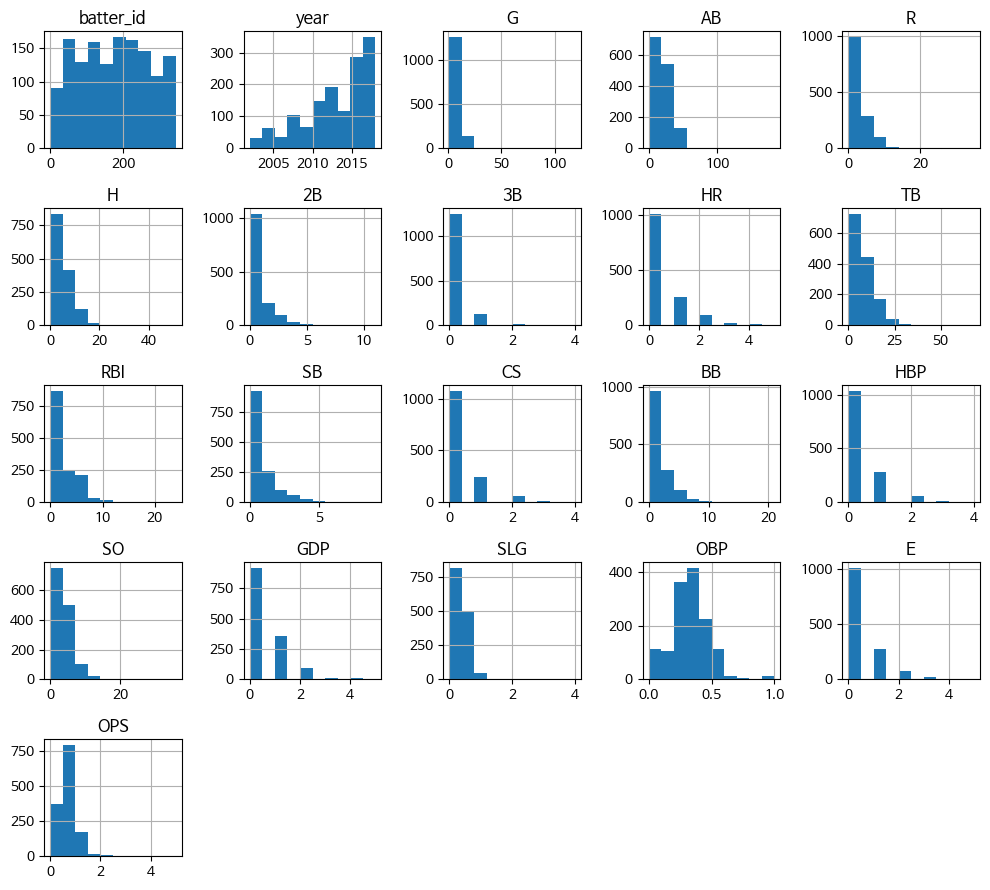

In [8]:
#데이터 시각화
preseason_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

In [9]:
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
# 정규시즌 연도별 기록된 선수의 수

presason_count = preseason_df.groupby('year')['batter_id'].count().rename('regular')
# 시범경기 연도별 기록된 선수의 수

pd.concat([regular_count, presason_count,np.round(presason_count/regular_count,2)
            .rename('ratio')],axis=1).transpose().loc[:,2002:]

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
regular,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [10]:
regular_count

year
1993      1
1994      2
1995      1
1996      7
1997      8
1998     10
1999     14
2000     20
2001     32
2002     43
2003     54
2004     68
2005     73
2006     85
2007     98
2008    115
2009    124
2010    130
2011    151
2012    174
2013    194
2014    186
2015    207
2016    213
2017    217
2018    227
Name: regular, dtype: int64

In [11]:
regular_season_df['new_idx'] = regular_season_df['batter_name'] + regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)
# 타자의 이름과 연도를 이용해 새로운 인덱스 생성

intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))
# 교집합

regular_season_new = regular_season_df.loc[regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
regular_season_new = regular_season_new.sort_values(by='new_idx').reset_index(drop = True)
#인덱스 정렬

preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by='new_idx').reset_index(drop = True)

print(regular_season_new.shape)
sum(regular_season_new['new_idx'] == preseason_new['new_idx'])

(1358, 30)


1358

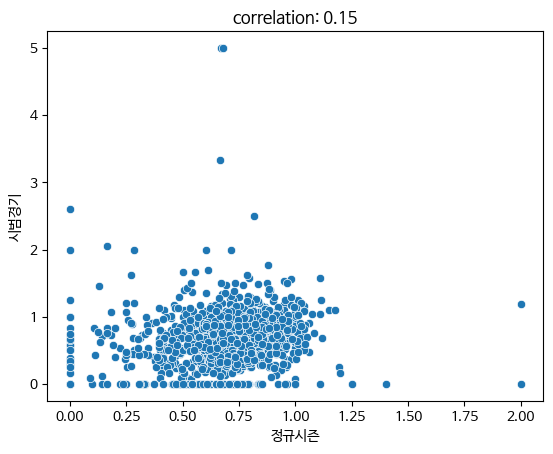

In [12]:
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(x = regular_season_new['OPS'], y = preseason_new['OPS'])
plt.title('correlation: ' + str(np.round(correlation, 2)))
plt.xlabel("정규시즌")
plt.ylabel("시범경기")
plt.show()

**정규시즌과 시범경기의 상관 관계는 적다**

*시범경기 데이터를 분석할 필요는 없다*

# OPS와 정규시즌 데이터 관계 분석

In [13]:
display(regular_season_df.shape, regular_season_df['OPS'].head(),regular_season_df.describe())

(2454, 30)

0    0.902
1    0.000
2    0.686
3    0.673
4    0.489
Name: OPS, dtype: float64

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


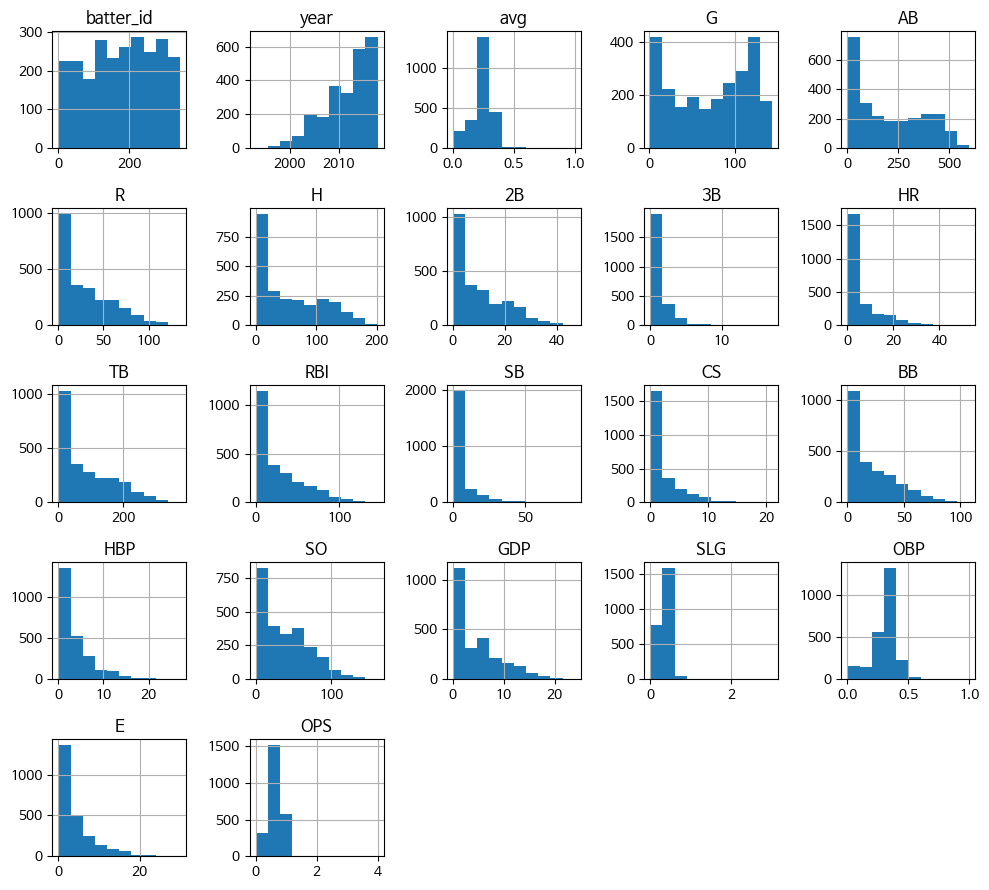

In [14]:
regular_season_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

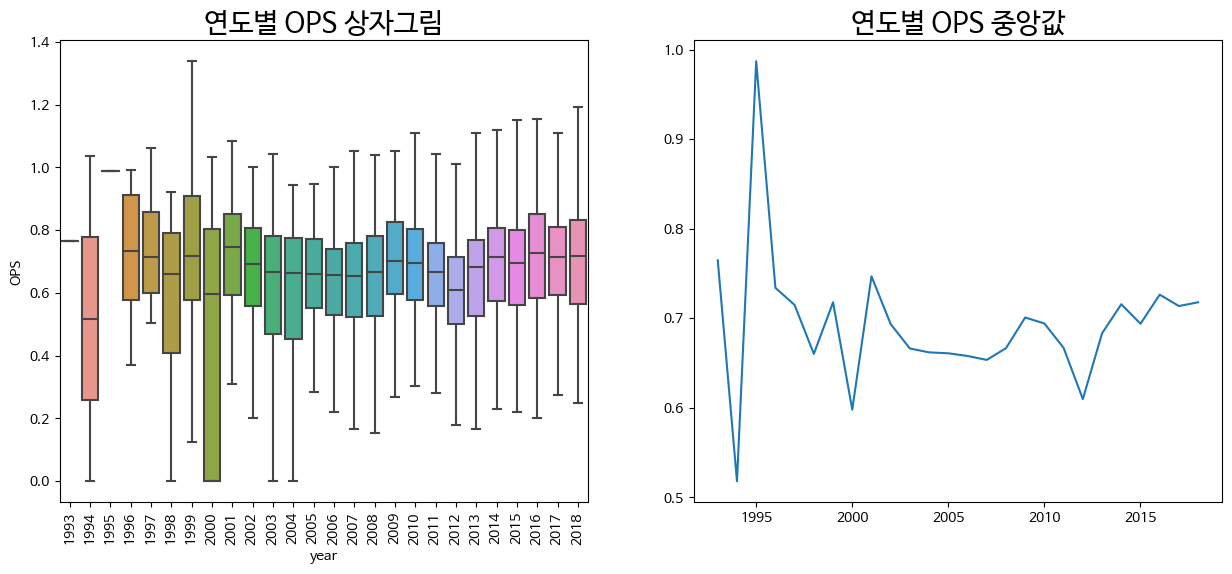

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
g = sns.boxplot(x="year",y="OPS", data=regular_season_df, showfliers=False)
g.set_title('연도별 OPS 상자그림', size=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size=20)
plt.show()

In [16]:
pd.crosstab(regular_season_df['year'], 'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


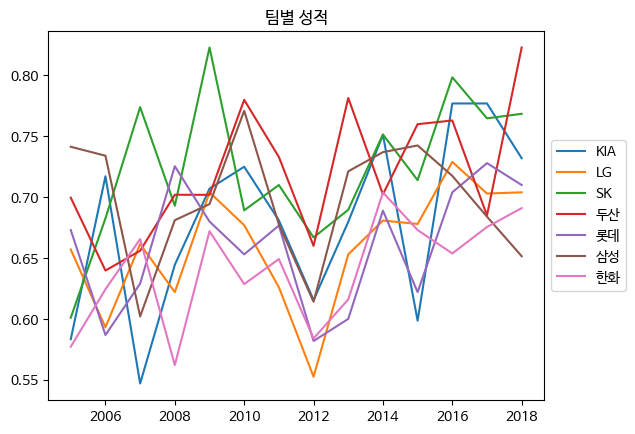

In [17]:
med_OPS_team = regular_season_df.pivot_table(index=['team'], columns='year', values='OPS', aggfunc='median')

team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis=1) <= 0

# 결측치가 존재하지 않는 팀만 확인

plt.plot(med_OPS_team.loc[team_idx,2005:].T)
plt.legend(med_OPS_team.loc[team_idx,2005:].T.columns,loc='center left', bbox_to_anchor=(1,0.5))
plt.title('팀별 성적')
plt.show()

In [18]:
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [19]:
regular_season_df['pos'] = regular_season_df['position'].apply(lambda x: x.split('(')[0] if pd.notnull(x) else x)
# 포지션 분류

regular_season_df['hit_way'] = regular_season_df['position'].apply(lambda x: x[-3:-1] if pd.notnull(x) else x)
# 타격 방향

print(regular_season_df['position'][0],regular_season_df['pos'][0],regular_season_df['hit_way'][0])

내야수(우투우타) 내야수 우타


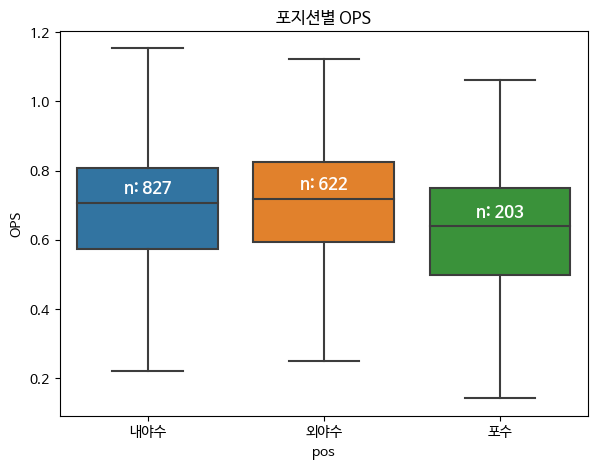

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x='pos',y='OPS', data = regular_season_df, showfliers = False)

medians = regular_season_df.groupby('pos')['OPS'].median().to_dict()
# 포지션별 OPS 중앙값

nobs = regular_season_df['pos'].value_counts().to_dict()
# 포지션별 수

for key in nobs: nobs[key] = 'n: '+str(nobs[key])

xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

for label in ax.get_xticklabels():
  ax.text(xticks_labels.index(label.get_text()),
    medians[label.get_text()]+0.03,nobs[label.get_text()],
    horizontalalignment='center',size='large',color='w',weight='semibold')

ax.set_title('포지션별 OPS')

plt.show()

In [21]:
regular_season_df['career'].head()

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [22]:
foreign_country = regular_season_df['career'].apply(lambda x: x.replace('-',' ').split(' ')[0])

foreign_country_list = list(set(foreign_country.apply(lambda x: np.nan if '초' in x else x)))

foreign_country

0          쿠바
1       광주대성초
2       광주대성초
3       광주대성초
4       광주대성초
        ...  
2449      석천초
2450      석천초
2451      석천초
2452      석천초
2453      석천초
Name: career, Length: 2454, dtype: object

In [23]:
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['도미니카', '네덜란드', '캐나다', '쿠바', '미국']

In [24]:
regular_season_df['country'] = foreign_country
regular_season_df['country'] = regular_season_df['country'].apply(
    lambda x: x if pd.isnull(x) else('foreign' if x in foreign_country_list else 'korean'))
regular_season_df['country']

0       foreign
1        korean
2        korean
3        korean
4        korean
         ...   
2449     korean
2450     korean
2451     korean
2452     korean
2453     korean
Name: country, Length: 2454, dtype: object

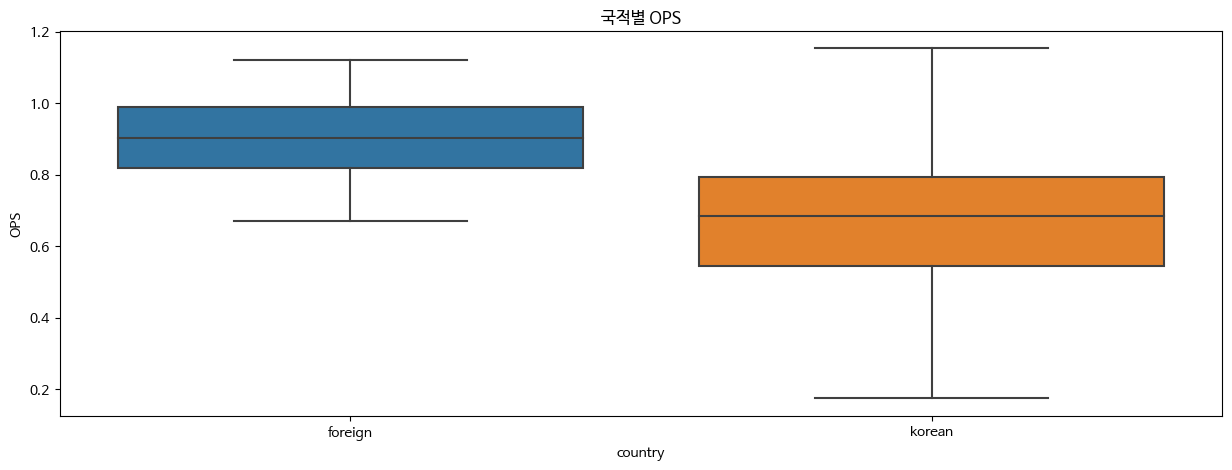

In [25]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(x='country',y='OPS', data=regular_season_df, showfliers = False)

medians = regular_season_df.groupby('country')['OPS'].median().to_dict()

nobs = regular_season_df['country'].value_counts().to_dict()

for key in nobs: nobs[key] = "n: " + str(nobs[key])

ax.set_title('국적별 OPS')
plt.show()

In [26]:
regular_season_df['starting_salary'].value_counts()

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
4000만원       62
12000만원      62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
33000만원      10
6500만원       10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

In [27]:
import re

regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(
    lambda x: x if pd.isnull(x) else(int(re.findall('\d+', x)[0]) if '만원' in x else np.nan))

<ipython-input-28-b6c3a0a5be37>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  b = sns.distplot(regular_season_df['starting_salary'].loc[regular_season_df['starting_salary'].notnull()], hist = True)


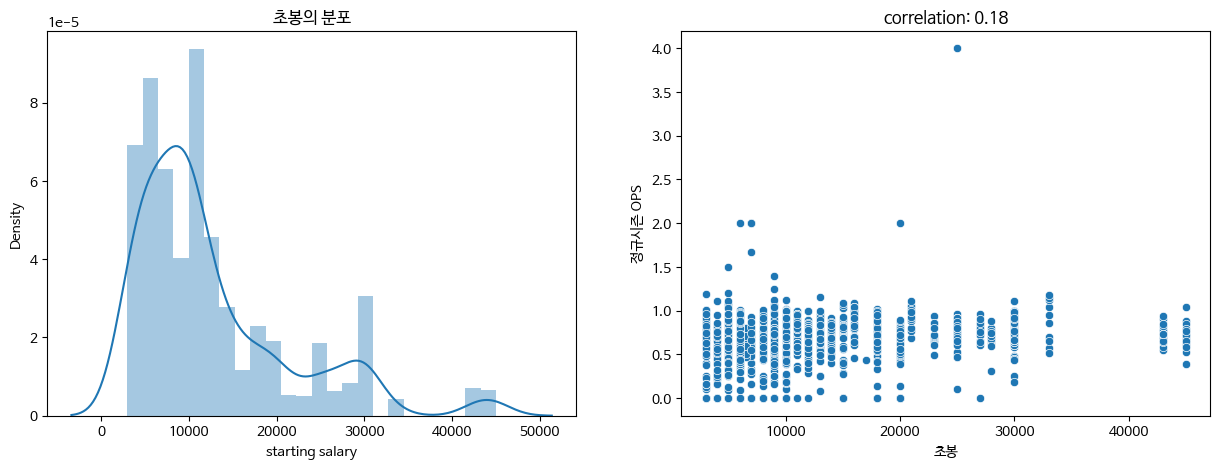

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
b = sns.distplot(regular_season_df['starting_salary'].loc[regular_season_df['starting_salary'].notnull()], hist = True)
b.set_xlabel('starting salary')
b.set_title('초봉의 분포')

plt.subplot(1,2,2)
correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b = sns.scatterplot(x = regular_season_df['starting_salary'], y = regular_season_df['OPS'])
b.set_title('correlation: ' + str(np.round(correlation, 2)))
b.set_xlabel("초봉")
b.set_ylabel("정규시즌 OPS")

plt.show()

**초봉과 OPS의 상관 관계는 적다**

  정규시즌 데이터에서 OPS와 높은 상관관계를 갖는 데이터는 없다 

# 일별 데이터 분석

In [29]:
day_by_day_df = pd.read_csv('/content/drive/MyDrive/ML study/62540_KBO_prediction_data/Regular_Season_Batter_Day_by_Day_b4.csv')
display(day_by_day_df.shape, day_by_day_df.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [30]:
day_by_day_df['month'] = day_by_day_df['date'].apply(lambda x: str(x).split('.')[0])

agg_df = day_by_day_df.groupby(['year', 'month'])['avg2'].mean().reset_index()

agg_df = agg_df.pivot_table(index=['month'], columns='year', values='avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


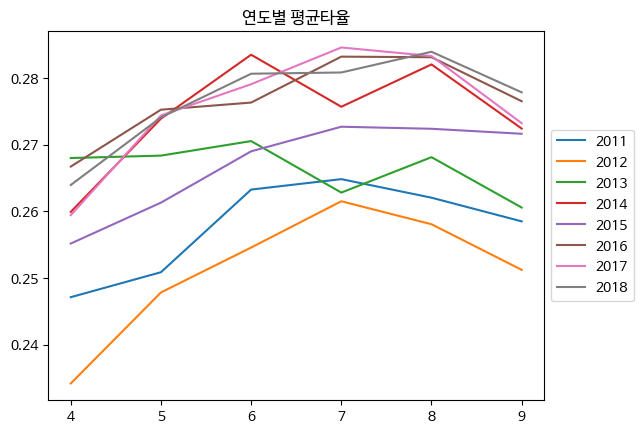

In [31]:
plt.plot(agg_df.iloc[2:,10:])
plt.legend(agg_df.iloc[2:,10:].columns,loc='center left',bbox_to_anchor=(1,0.5))
plt.title('연도별 평균타율')
plt.show()

# EDA 전체 요약

- 시범경기 데이터는 수가 적고, 정규시즌과 상관관계가 낮다

- OPS가 외국인 타자의 경우 더 높게 나타나는 경향이 있다

- 7월 이후 성적이 수렴되는 것을 알 수 있다

# 데이터 전처리

In [32]:
pd.DataFrame(regular_season_df.isna().sum()).transpose()
# 결측치 개수, true = 1, false = 0

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,height/weight,year_born,position,career,starting_salary,OPS,new_idx,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,...,802,0,802,0,1076,26,0,802,802,0


In [33]:
numerics = ['int16','int32','int64','float16','float32','float64']
num_cols = regular_season_df.select_dtypes(include=numerics).columns

regular_season_df.loc[regular_season_df[num_cols].isna().sum(axis=1) > 0, num_cols].head()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,CS,BB,HBP,SO,GDP,SLG,OBP,E,starting_salary,OPS
0,0,2018,0.339,50,183,27,62,9,0,8,...,0,9,8,25,3,0.519000,0.383000,9,NaN,0.902000
12,138,2005,0.127,39,63,9,8,2,0,0,...,2,7,4,15,1,0.158730,0.256757,3,NaN,0.415487
13,138,2006,0.139,37,36,6,5,2,0,0,...,0,8,2,14,0,0.194444,0.326087,4,NaN,0.520531
14,138,2007,0.000,8,4,3,0,0,0,0,...,0,0,0,2,1,0.000000,0.000000,0,NaN,0.000000
15,138,2008,0.000,2,1,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0,NaN,0.000000


In [34]:
regular_season_df[regular_season_df.select_dtypes(include=numerics).columns]= regular_season_df[regular_season_df.select_dtypes(include=numerics).columns].fillna(0)
regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,height/weight,year_born,position,career,starting_salary,OPS,new_idx,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,가르시아2018,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,강경학2011,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,강경학2014,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,강경학2015,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,강경학2016,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,황진수2014,내야수,양타,korean
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,황진수2015,내야수,양타,korean
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,황진수2016,내야수,양타,korean
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.761,황진수2017,내야수,양타,korean


In [35]:
day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns]= day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns].fillna(0)
day_by_day_df

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,...,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year,month
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,...,0,0,0,1,0,1,0,0.333,2018,3
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,...,0,0,0,0,0,1,0,0.143,2018,3
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,...,0,0,0,0,0,0,0,0.167,2018,3
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,...,1,0,0,0,0,0,0,0.176,2018,3
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,...,3,0,0,0,0,0,1,0.190,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,6.23,LG,-,0,0,0,0,0,...,0,0,0,1,0,0,0,0.158,2018,6
112269,344,황진수,6.26,넥센,0.000,1,0,0,0,0,...,0,0,0,0,0,1,0,0.150,2018,6
112270,344,황진수,6.27,넥센,0.500,2,1,1,1,0,...,0,0,0,0,0,1,0,0.182,2018,6
112271,344,황진수,6.28,넥센,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182,2018,6


In [36]:
preseason_df[preseason_df.select_dtypes(include=numerics).columns]= preseason_df[preseason_df.select_dtypes(include=numerics).columns].fillna(0)
preseason_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,가르시아2018
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500,강경학2011
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0.000,0.000,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2014
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416,강경학2015
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493,강경학2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,0.593,0.448,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041,황재균2014
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,0.433,0.389,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822,황재균2015
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,0.429,0.370,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799,황재균2016
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,...,0.500,0.333,3,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833,황재균2018


In [37]:
not_num_cols = [x for x in regular_season_df.columns if x not in num_cols]

regular_season_df.loc[regular_season_df[not_num_cols].isna().sum(axis=1)>0, not_num_cols].head()

,batter_name,team,height/weight,year_born,position,career,new_idx,pos,hit_way,country
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2005,NaN,NaN,korean
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2006,NaN,NaN,korean
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2007,NaN,NaN,korean
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2008,NaN,NaN,korean
16,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2011,NaN,NaN,korean


In [38]:
# 잘못된 값 삭제

drop_idx = regular_season_df.loc[((regular_season_df['H']>0) & regular_season_df['SLG'] == 0) | 
                                 (((regular_season_df['H']>0) | (regular_season_df['BB']>0) |
                                   (regular_season_df['HBP'] >0)) &  (regular_season_df['OBP'] == 0))].index

In [39]:
regular_season_df = regular_season_df.drop(drop_idx).reset_index(drop=True)
regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,height/weight,year_born,position,career,starting_salary,OPS,new_idx,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902000,가르시아2018,내야수,우타,foreign
1,1,강경학,2014,한화,0.221,41,86,11,19,2,...,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686000,강경학2014,내야수,좌타,korean
2,1,강경학,2015,한화,0.257,120,311,50,80,7,...,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673000,강경학2015,내야수,좌타,korean
3,1,강경학,2016,한화,0.158,46,101,16,16,3,...,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489000,강경학2016,내야수,좌타,korean
4,1,강경학,2017,한화,0.214,59,84,17,18,2,...,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.552000,강경학2017,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,343,황정립,2012,KIA,0.149,18,47,4,7,0,...,NaN,1989년 12월 14일,NaN,학동초-경원중-배명고-고려대,0.0,0.511012,황정립2012,NaN,NaN,korean
2252,343,황정립,2013,KIA,0.244,21,45,8,11,2,...,NaN,1989년 12월 14일,NaN,학동초-경원중-배명고-고려대,0.0,0.759064,황정립2013,NaN,NaN,korean
2253,344,황진수,2012,롯데,0.111,28,18,2,2,1,...,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.325000,황진수2012,내야수,양타,korean
2254,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.761000,황진수2017,내야수,양타,korean


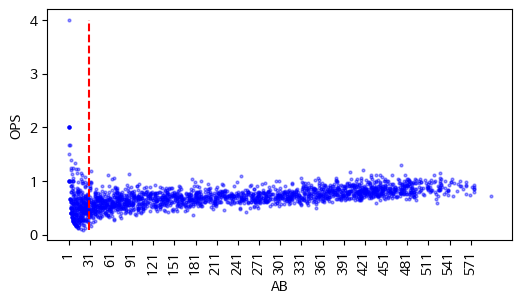

In [40]:
# 규정타석을 위한 처리

plt.figure(figsize = (6,3))
plt.plot('AB','OPS', data=regular_season_df, linestyle='none', marker='o', markersize=2, color='blue', alpha=0.4)
plt.xlabel('AB')
plt.ylabel('OPS')
plt.xticks(list(range(min(regular_season_df['AB']), max(regular_season_df['AB']),30)), rotation=90)
plt.vlines(30,ymin=min(regular_season_df['OPS']), ymax=max(regular_season_df['OPS']), linestyles='dashed', colors='r')
plt.show()

In [41]:
#이상치

Q1 = regular_season_df['OPS'].quantile(0.25)
Q3 = regular_season_df['OPS'].quantile(0.75)
IQR = Q3 - Q1

regular_season_df.loc[(regular_season_df['OPS'] < (Q1 - 1.5*IQR)) |
                      (regular_season_df['OPS'] > (Q3 + 1.5*IQR))].sort_values(
                          by=['AB'], axis=0, ascending=False)[['batter_name','AB','year','OPS']].head(10)

,batter_name,AB,year,OPS
733,박병호,528,2015,1.150000
2151,테임즈,472,2015,1.293656
84,강정호,418,2014,1.200156
734,박병호,400,2018,1.175000
586,노진혁,38,2015,0.254000
329,김연훈,36,2008,0.246246
1225,유재신,33,2018,1.192000
2172,한승택,33,2013,0.165000
1992,채상병,32,2002,0.215909
1084,안치용,28,2006,0.232719


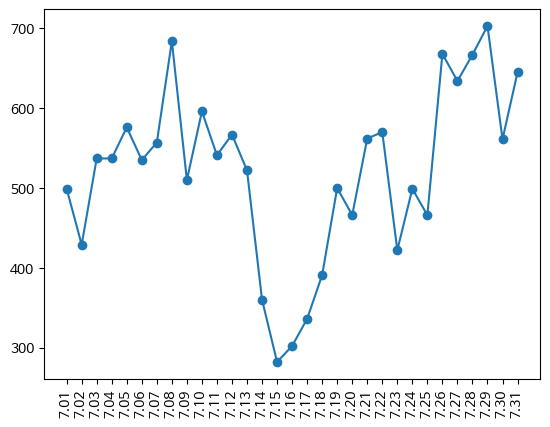

In [42]:
major_ticks = list(np.round(np.linspace(7.01,7.31,31),2))

july = (day_by_day_df['date'] >= 7) & (day_by_day_df['date'] < 8)

plt.plot(major_ticks, day_by_day_df['date'].loc[july].value_counts().sort_index(), marker='o')
plt.xticks(major_ticks, rotation=90)
plt.show()

In [43]:
# 시간변수 생성하는 함수

def lag_function(df, var_name, past):
  df.reset_index(drop=True, inplace=True)
  df['lag'+str(past)+'_'+var_name] = np.nan
  df['lag'+str(past)+'_'+'AB'] = np.nan

  for col in ['AB', var_name]:
    for i in range(0,(max(df.index)+1)):
      val = df.loc[(df['batter_name'] == df['batter_name'][i]) & (df['year'] == df['year'][i] - past), col]

      if len(val) != 0:
        df.loc[i,'lag'+str(past)+'_'+col] = val.iloc[0]

  df.loc[df['lag'+str(past)+'_'+'AB'] <30, 'lag'+str(past)+'_'+var_name] = np.nan
  df.drop('lag'+str(past)+'_'+'AB',axis=1,inplace=True)
  
  return df

<ipython-input-44-164a331555c5>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = regular_season_temp.corr()
<ipython-input-44-164a331555c5>:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype = np.bool)


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

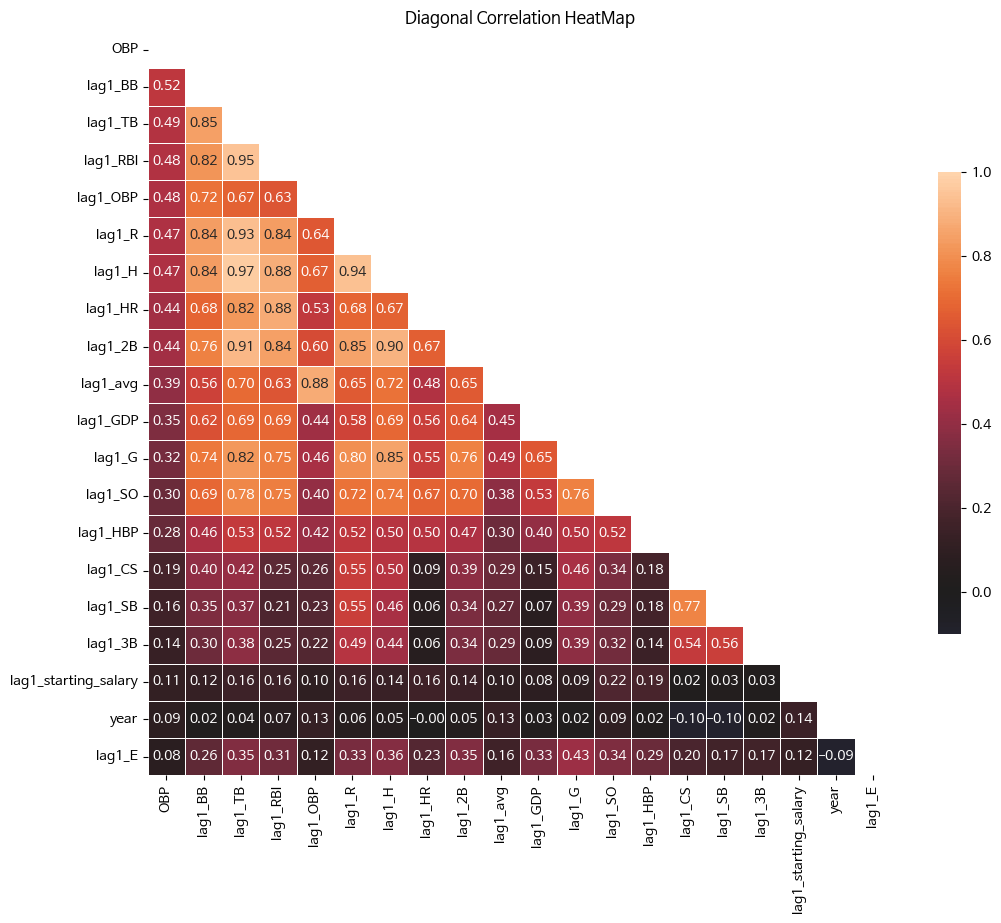

In [44]:
numeric_cols = list(regular_season_df.select_dtypes(include=numerics).drop(['batter_id','year','OPS','SLG'],axis=1).columns)

regular_season_temp = regular_season_df[numeric_cols + ['year','batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB'] >= 30]

for col in numeric_cols:
  regular_season_temp = lag_function(regular_season_temp, col, 1)

numeric_cols.remove('OBP')
regular_season_temp.drop(numeric_cols, axis=1, inplace=True)

corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by='OBP', axis=0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

f, ax = plt.subplots(figsize=(12,12))
corr= regular_season_temp.select_dtypes(exclude=['object','bool']).corr()

mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, vmax=1, mask = mask, center=0, annot= True,
                fmt='.2f', square=True, linewidths=.5,cbar_kws = {"shrink":.5})
plt.title('Diagonal Correlation HeatMap')

In [45]:
regular_season_df['SF'] = regular_season_df[['H','BB','HBP']].sum(axis=1) / \
          regular_season_df['OBP']- regular_season_df[['AB','BB','HBP']].sum(axis=1)
regular_season_df['SF'].fillna(0,inplace=True)
regular_season_df['SF'] = regular_season_df['SF'].apply(lambda x : round(x,0))

regular_season_df['SF_1'] = regular_season_df['SF'] / regular_season_df['AB']
regular_season_df_SF = regular_season_df[['batter_name','year','SF_1']]

regular_season_df_SF

,batter_name,year,SF_1
0,가르시아,2018,0.032787
1,강경학,2014,-0.000000
2,강경학,2015,0.009646
3,강경학,2016,0.009901
4,강경학,2017,0.000000
...,...,...,...
2251,황정립,2012,0.000000
2252,황정립,2013,0.000000
2253,황진수,2012,-0.000000
2254,황진수,2017,0.008547


In [46]:
from pandas.core._numba.kernels import sum_
sum_hf_yr_OBP = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(
    ['batter_name','year'])['AB','H','BB','HBP'].sum().reset_index()
# 연도별 선수의 시즌 상반기 출루율과 관련된 성적 합 구하기

sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df_SF, how='left',on=['batter_name','year'])

sum_hf_yr_OBP['SF'] = (sum_hf_yr_OBP['SF_1'] * sum_hf_yr_OBP['AB']).apply(
    lambda x: round(x,0))
sum_hf_yr_OBP.drop('SF_1', axis =1, inplace=True)

sum_hf_yr_OBP['OBP'] = sum_hf_yr_OBP[['H','BB','HBP']].sum(axis=1) / sum_hf_yr_OBP[['AB','BB','HBP','SF']].sum(axis=1)

sum_hf_yr_OBP['OBP'].fillna(0, inplace=True)

sum_hf_yr_OBP = sum_hf_yr_OBP[['batter_name','year','AB','OBP']]
sum_hf_yr_OBP

<ipython-input-46-192460fc3d26>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_hf_yr_OBP = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(


,batter_name,year,AB,OBP
0,가르시아,2018,85,0.418367
1,강경학,2011,1,0.000000
2,강경학,2014,0,1.000000
3,강경학,2015,156,0.342541
4,강경학,2016,81,0.222222
...,...,...,...,...
1381,황진수,2012,4,0.400000
1382,황진수,2013,0,0.000000
1383,황진수,2016,9,0.000000
1384,황진수,2017,71,0.316456


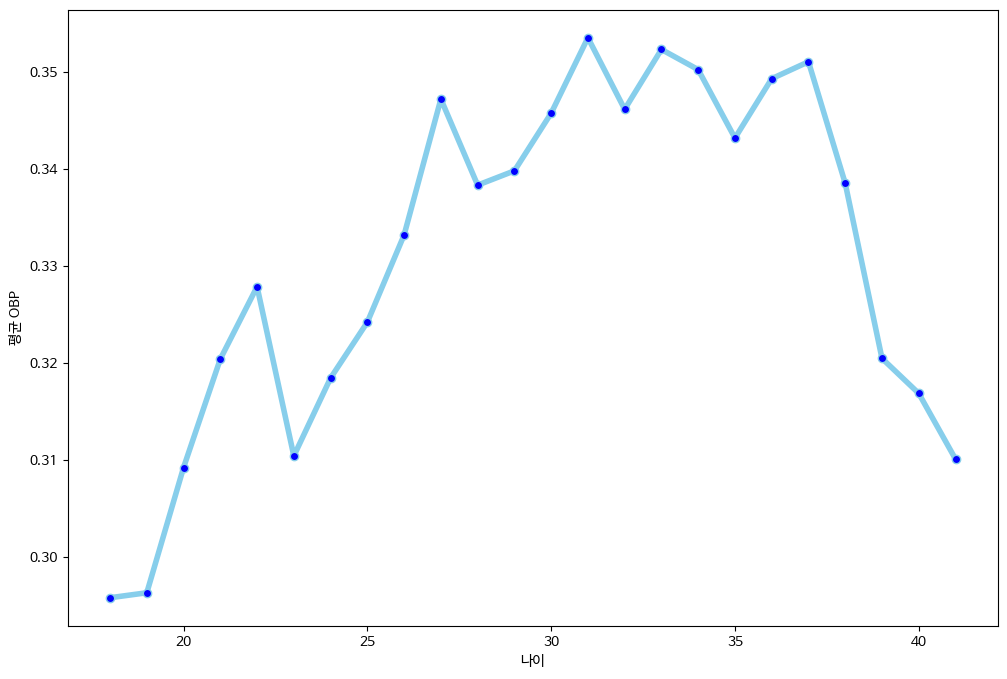

In [47]:
regular_season_df['age'] = regular_season_df['year'] - regular_season_df['year_born'].apply(lambda x: int(x[:4]))

temp_df = regular_season_df.loc[regular_season_df['AB'] >=30].groupby('age').agg({'OBP':['mean','median']}).reset_index()

temp_df.columns = temp_df.columns.droplevel()
temp_df.columns = ['age','mean_OBP','median_OBP']

plt.figure(figsize=(12, 8))
plt.plot('age','mean_OBP',data=temp_df, marker='o', markerfacecolor='blue',color='skyblue',linewidth=4)
plt.ylabel('평균 OBP')
plt.xlabel('나이')
plt.show()

In [48]:
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df[['batter_name','year','age']],how='left',on=['batter_name','year'])

sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP,"OBP", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP,"OBP", 2)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP,"OBP", 3)

sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP
0,가르시아,2018,85,0.418367,33.0,NaN,NaN,NaN
1,강경학,2011,1,0.000000,NaN,NaN,NaN,NaN
2,강경학,2014,0,1.000000,22.0,NaN,NaN,NaN
3,강경학,2015,156,0.342541,23.0,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24.0,0.342541,NaN,NaN
...,...,...,...,...,...,...,...,...
1381,황진수,2012,4,0.400000,23.0,NaN,NaN,NaN
1382,황진수,2013,0,0.000000,NaN,NaN,NaN,NaN
1383,황진수,2016,9,0.000000,NaN,NaN,NaN,NaN
1384,황진수,2017,71,0.316456,28.0,NaN,NaN,NaN


In [49]:
round(sum_hf_yr_OBP[['lag1_OBP','lag2_OBP','lag3_OBP']].isna().sum()/ sum_hf_yr_OBP.shape[0], 2)

lag1_OBP    0.41
lag2_OBP    0.54
lag3_OBP    0.61
dtype: float64

In [50]:
player_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >=30 ].groupby('batter_name')['AB','H','BB','HBP','SF'].sum().reset_index()
player_OBP_mean['mean_OBP'] = player_OBP_mean[['H','BB','HBP']].sum(axis=1) / player_OBP_mean[['AB','BB','HBP','SF']].sum(axis=1)
# 선수별 출루율 평균

season_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('year')['AB','H','BB','HBP','SF'].sum().reset_index()
season_OBP_mean['mean_OBP'] = season_OBP_mean[['H','BB','HBP']].sum(axis=1) / season_OBP_mean[['AB','BB','HBP','SF']].sum(axis=1)
season_OBP_mean = season_OBP_mean[['year','mean_OBP']]
#시즌별 출루율 평균

sum_hf_yr_OBP = sum_hf_yr_OBP.merge(player_OBP_mean[['batter_name','mean_OBP']],how='left', on='batter_name')
sum_hf_yr_OBP = sum_hf_yr_OBP.loc[~sum_hf_yr_OBP['mean_OBP'].isna()].reset_index(drop=True)

sum_hf_yr_OBP

<ipython-input-50-463cb77df459>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >=30 ].groupby('batter_name')['AB','H','BB','HBP','SF'].sum().reset_index()
<ipython-input-50-463cb77df459>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('year')['AB','H','BB','HBP','SF'].sum().reset_index()


,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33.0,NaN,NaN,NaN,0.383495
1,강경학,2011,1,0.000000,NaN,NaN,NaN,NaN,0.337880
2,강경학,2014,0,1.000000,22.0,NaN,NaN,NaN,0.337880
3,강경학,2015,156,0.342541,23.0,NaN,NaN,NaN,0.337880
4,강경학,2016,81,0.222222,24.0,0.342541,NaN,NaN,0.337880
...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,23.0,NaN,NaN,NaN,0.358779
1348,황진수,2013,0,0.000000,NaN,NaN,NaN,NaN,0.358779
1349,황진수,2016,9,0.000000,NaN,NaN,NaN,NaN,0.358779
1350,황진수,2017,71,0.316456,28.0,NaN,NaN,NaN,0.358779


In [51]:
def lag_na_fill(data_set, var_name, past, season_var_mean_data):

  for i in range(0, len(data_set)):
    if np.isnan(data_set['lag'+str(past)+'_'+var_name][i]):
      data_set.loc[i,['lag'+str(past)+'_'+var_name]] = (
          data_set['mean'+'_'+var_name][i] + season_var_mean_data.loc[
              season_var_mean_data['year']==(data_set['year'][i]-past),
              'mean_'+var_name].iloc[0]) /2
  return data_set

In [52]:
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP,'OBP',1,season_OBP_mean)
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP,'OBP',2,season_OBP_mean)
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP,'OBP',3,season_OBP_mean)

sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33.0,0.369982,0.375910,0.373119,0.383495
1,강경학,2011,1,0.000000,NaN,0.347434,0.348603,0.344259,0.337880
2,강경학,2014,0,1.000000,22.0,0.346682,0.337511,0.343131,0.337880
3,강경학,2015,156,0.342541,23.0,0.353425,0.346682,0.337511,0.337880
4,강경학,2016,81,0.222222,24.0,0.342541,0.353425,0.346682,0.337880
...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,23.0,0.353580,0.357883,0.359052,0.358779
1348,황진수,2013,0,0.000000,NaN,0.347960,0.353580,0.357883,0.358779
1349,황진수,2016,9,0.000000,NaN,0.360760,0.363874,0.357131,0.358779
1350,황진수,2017,71,0.316456,28.0,0.363552,0.360760,0.363874,0.358779


<ipython-input-53-8c6dee8769df>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = regular_season_temp.corr()
<ipython-input-53-8c6dee8769df>:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

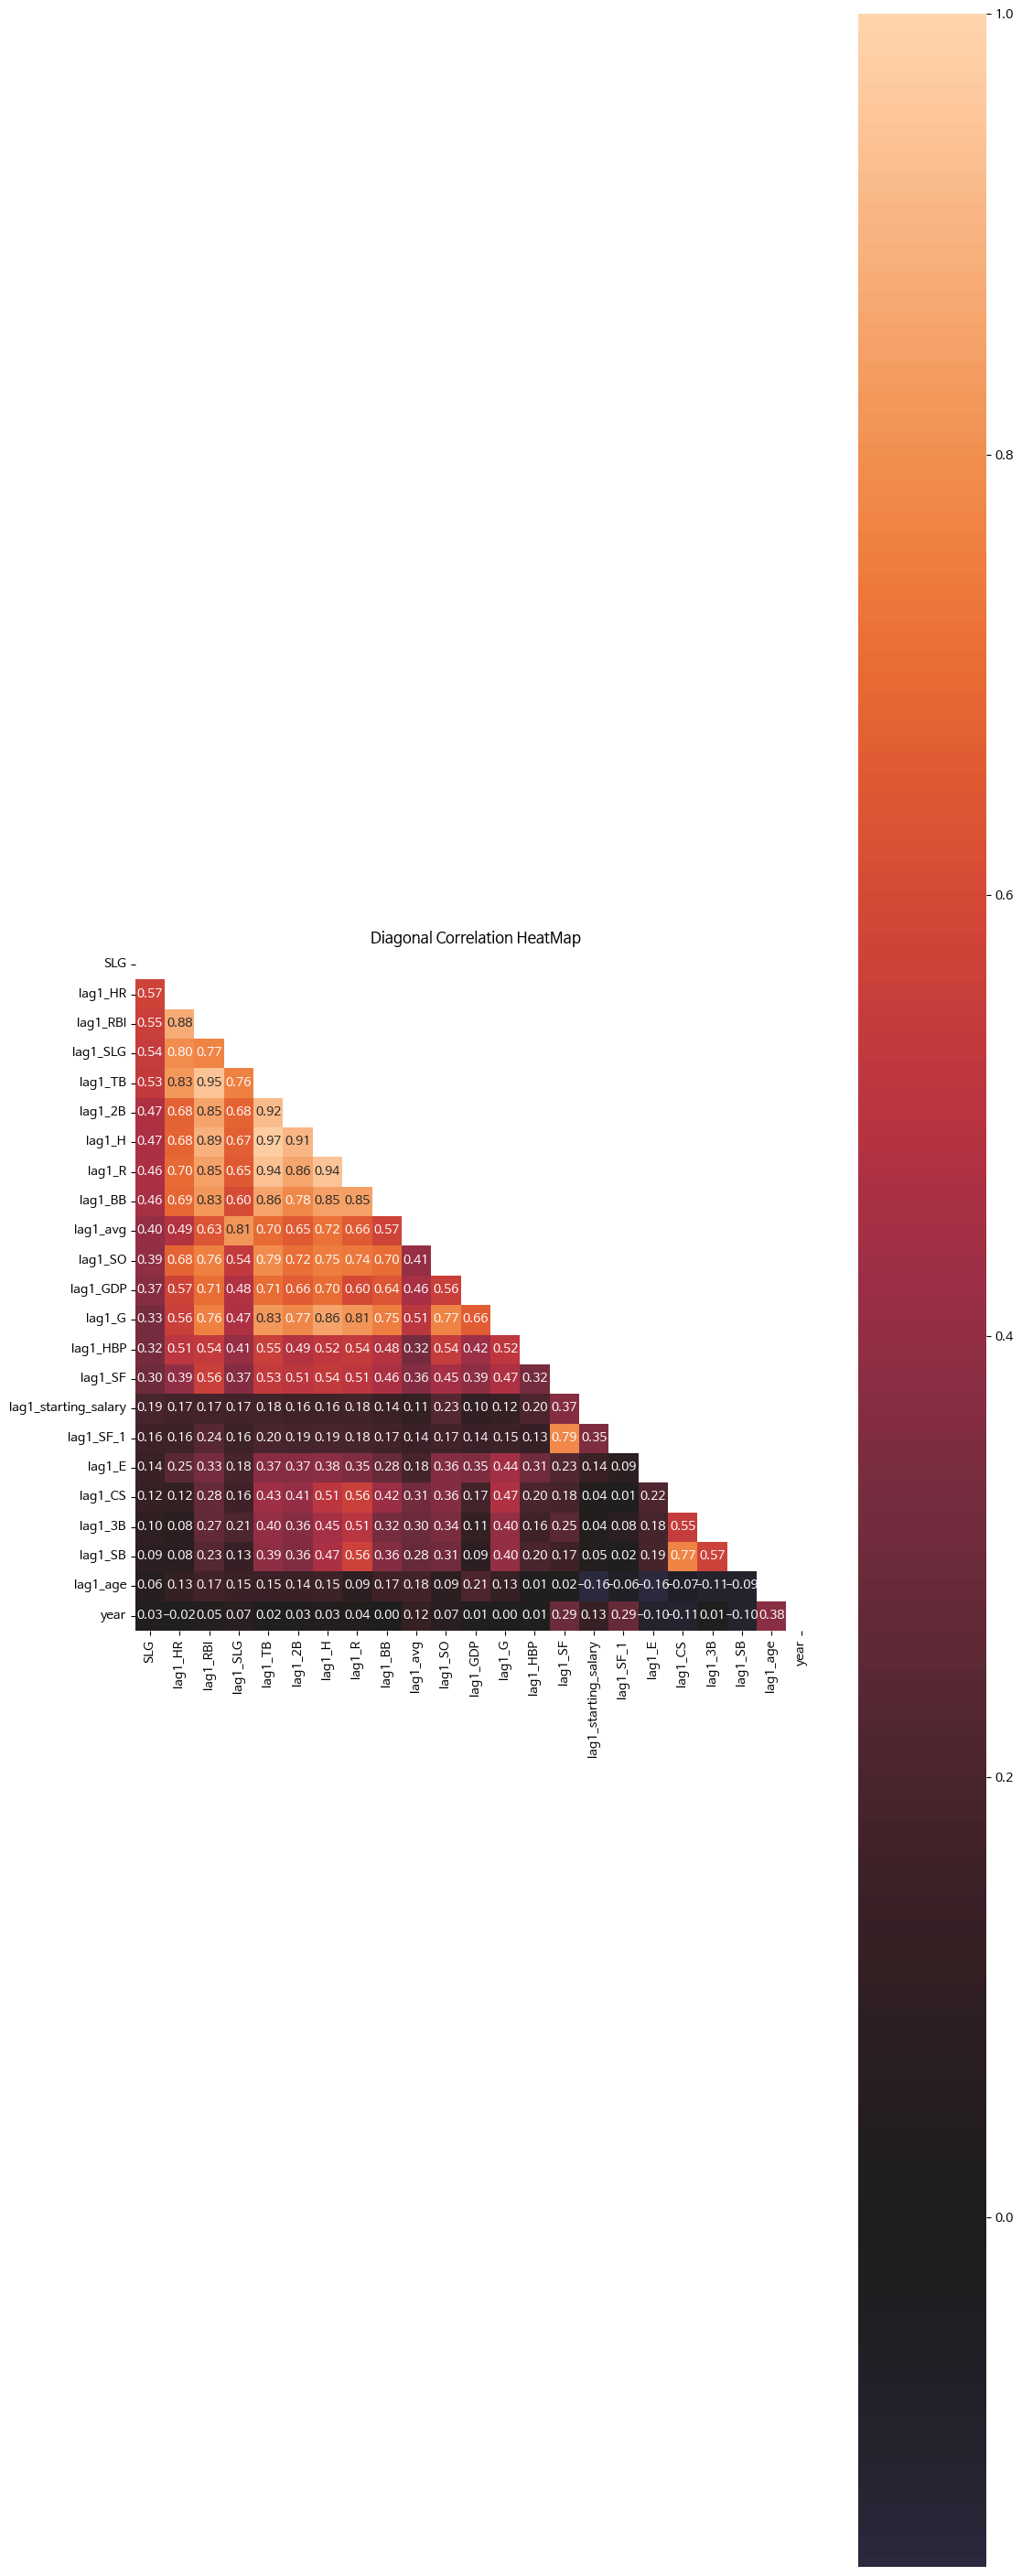

In [53]:
numeric_cols = list(regular_season_df.select_dtypes(include=numerics).drop(['batter_id','year','OPS','OBP'],axis = 1).columns)

regular_season_temp = regular_season_df[numeric_cols + ['year','batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB'] >= 0]
# 상관관계를 탐색할 변수 선택

for col in numeric_cols:
  regular_season_temp = lag_function(regular_season_temp, col, 1)

numeric_cols.remove('SLG')
regular_season_temp.drop(numeric_cols,axis=1, inplace=True)
# 시간변수 생성 함수를 통한 지표별 1년 전 성적 추출

corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by='SLG', axis=0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

f, ax = plt.subplots(figsize=(12,12))
corr = regular_season_temp.select_dtypes(exclude=['object','bool']).corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(corr_matrix, vmax=1,mask=mask, center=0, annot=True, fmt='.2f',square=True, cbar_kws={'shrink': 5})
plt.title('Diagonal Correlation HeatMap')

In [54]:
sum_hf_yr_SLG = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(['batter_name','year'])['AB','H','2B','3B','HR'].sum().reset_index()

sum_hf_yr_SLG['SLG'] = (sum_hf_yr_SLG['H'] - sum_hf_yr_SLG[['2B','3B','HR']].sum(axis=1)
              +sum_hf_yr_SLG['2B']*2 + sum_hf_yr_SLG['3B']*3 + sum_hf_yr_SLG['HR']*4 ) / sum_hf_yr_SLG['AB']

sum_hf_yr_SLG['SLG'].fillna(0, inplace=True)

sum_hf_yr_SLG = sum_hf_yr_SLG[['batter_name','year','AB','SLG']]
sum_hf_yr_SLG = sum_hf_yr_SLG.merge(regular_season_df[['batter_name','year','age']],
                                    how='left', on=['batter_name', 'year'])

sum_hf_yr_SLG.head()

<ipython-input-54-d11d8e195262>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_hf_yr_SLG = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(['batter_name','year'])['AB','H','2B','3B','HR'].sum().reset_index()


,batter_name,year,AB,SLG,age
0,가르시아,2018,85,0.552941,33.0
1,강경학,2011,1,0.000000,NaN
2,강경학,2014,0,0.000000,22.0
3,강경학,2015,156,0.333333,23.0
4,강경학,2016,81,0.222222,24.0


In [55]:
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG,'SLG',1)
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG,'SLG',2)
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG,'SLG',3)

round(sum_hf_yr_SLG[['lag1_SLG','lag2_SLG', 'lag3_SLG']].isna().sum()/sum_hf_yr_SLG.shape[0],2)

display(sum_hf_yr_SLG.head())

,batter_name,year,AB,SLG,age,lag1_SLG,lag2_SLG,lag3_SLG
0,가르시아,2018,85,0.552941,33.0,NaN,NaN,NaN
1,강경학,2011,1,0.000000,NaN,NaN,NaN,NaN
2,강경학,2014,0,0.000000,22.0,NaN,NaN,NaN
3,강경학,2015,156,0.333333,23.0,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24.0,0.333333,NaN,NaN


In [56]:
player_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >=30 ].groupby('batter_name')['AB','H','2B','3B','HR'].sum().reset_index()
player_SLG_mean['mean_SLG'] = (player_SLG_mean['H']-player_SLG_mean[['2B','3B','HR']].sum(axis=1) +
                               player_SLG_mean['2B']*2 + player_SLG_mean['3B']*3 + player_SLG_mean['HR']*4) / player_SLG_mean['AB']
# 선수별 장타율 평균

season_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('year')['AB','H','2B','3B','HR'].sum().reset_index()
season_SLG_mean['mean_SLG'] = (season_SLG_mean['H']-season_SLG_mean[['2B','3B','HR']].sum(axis=1) +
                               season_SLG_mean['2B']*2 + season_SLG_mean['3B']*3 + season_SLG_mean['HR']*4) / season_SLG_mean['AB']
#시즌별 장타율 평균

sum_hf_yr_SLG = sum_hf_yr_SLG.merge(player_SLG_mean[['batter_name','mean_SLG']],how='left', on='batter_name')
sum_hf_yr_SLG = sum_hf_yr_SLG.loc[~sum_hf_yr_SLG['mean_SLG'].isna()].reset_index(drop=True)

sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG,'SLG',1,season_SLG_mean)
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG,'SLG',2,season_SLG_mean)
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG,'SLG',3,season_SLG_mean)

round(sum_hf_yr_SLG[['lag1_SLG','lag2_SLG', 'lag3_SLG']].isna().sum()/sum_hf_yr_SLG.shape[0],2)

display(sum_hf_yr_SLG.head())
display(sum_hf_yr_OBP.head())

<ipython-input-56-89b2c9e786ec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >=30 ].groupby('batter_name')['AB','H','2B','3B','HR'].sum().reset_index()
<ipython-input-56-89b2c9e786ec>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('year')['AB','H','2B','3B','HR'].sum().reset_index()


,batter_name,year,AB,SLG,age,lag1_SLG,lag2_SLG,lag3_SLG,mean_SLG
0,가르시아,2018,85,0.552941,33.0,0.481855,0.481498,0.476627,0.519126
1,강경학,2011,1,0.000000,NaN,0.372902,0.380882,0.361716,0.332527
2,강경학,2014,0,0.000000,22.0,0.362931,0.349344,0.359616,0.332527
3,강경학,2015,156,0.333333,23.0,0.389415,0.362931,0.349344,0.332527
4,강경학,2016,81,0.222222,24.0,0.333333,0.389415,0.362931,0.332527


,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33.0,0.369982,0.375910,0.373119,0.383495
1,강경학,2011,1,0.000000,NaN,0.347434,0.348603,0.344259,0.337880
2,강경학,2014,0,1.000000,22.0,0.346682,0.337511,0.343131,0.337880
3,강경학,2015,156,0.342541,23.0,0.353425,0.346682,0.337511,0.337880
4,강경학,2016,81,0.222222,24.0,0.342541,0.353425,0.346682,0.337880


# 모델 구축과 검증

In [57]:
sum_hf_yr_OBP = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['AB'] >= 30]
sum_hf_yr_SLG = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['AB'] >= 30]

OBP_train = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] != 2018]
OBP_test = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] == 2018]

SLG_train = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] != 2018]
SLG_test = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] == 2018]

SLG_train = SLG_train.fillna(method='ffill')
OBP_train = OBP_train.fillna(method='ffill')
print(OBP_train.shape,OBP_test.shape,SLG_train.shape,SLG_test.shape)

(872, 9) (150, 9) (872, 9) (150, 9)


In [58]:
def wrmse(v,w,p):
  # v: 실제 값, w; 타수, p: 예측값
  # 문제에서 제시하는 평가 방법
  return sum(np.sqrt(((v-p)**2*w) / sum(w)))

**릿지와 라쏘**

In [59]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [60]:
lasso_params = {'alpha':np.logspace(-4, 1, 6)}
ridge_params = {'alpha':np.logspace(-4, 1, 6)}

OBP_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
        OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_,}

SLG_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
        SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_,}

**XGBoost**

In [61]:
import xgboost as xgb

XGB_params = {
    'min_child_weight': [1,3,5,10],
    'gamma': [0.3, 0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5, 7, 10]}

XGB_OBP_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42),
                                  param_grid=XGB_params, n_jobs=-1)

XGB_SLG_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42),
                                  param_grid=XGB_params, n_jobs=-1)
XGB_OBP_gridsearch.fit(OBP_train.iloc[:,-5:],OBP_train['OBP'])
XGB_SLG_gridsearch.fit(SLG_train.iloc[:,-5:],SLG_train['SLG'])

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.3, 0.5, 1, 1.5, 2, 5],
                         'max_depth': [3, 4, 5, 7, 10],
                         'min_child_weight': [1, 3, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]})

**Random Forest**

In [63]:
from sklearn.ensemble import RandomForestRegressor

RF_params={
    'n_estimators':[50,100,150,200,300,500,1000],
    'max_features': ['auto','sqrt'],
    'max_depth': [1,2,3,5,6,10],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,3,5,10]}

OBP_RF_models = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1,
        ).fit(OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_}

SLG_RF_models = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1,
        ).fit(SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_}

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


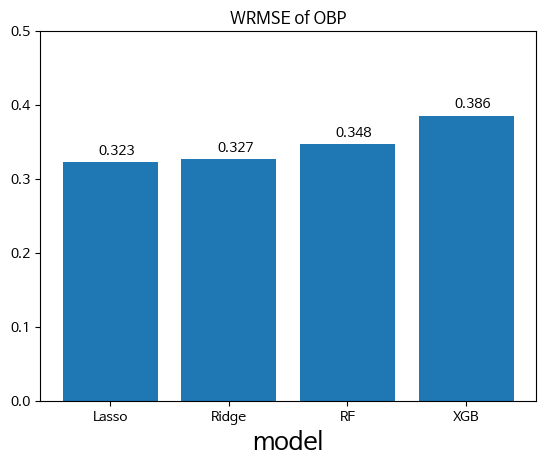

In [64]:
Lasso_OBP = OBP_linear_models['Lasso'].predict(OBP_test.iloc[:,-5:])
Ridge_OBP = OBP_linear_models['Ridge'].predict(OBP_test.iloc[:,-5:])
RF_OBP = OBP_RF_models['RF'].predict(OBP_test.iloc[:,-5:])
XGB_OBP = XGB_OBP_gridsearch.predict(OBP_test.iloc[:,-5:])

wrmse_score = [wrmse(OBP_test['OBP'],OBP_test['AB'], Lasso_OBP),
            wrmse(OBP_test['OBP'],OBP_test['AB'], Ridge_OBP),
            wrmse(OBP_test['OBP'],OBP_test['AB'], RF_OBP),
            wrmse(OBP_test['OBP'],OBP_test['AB'], XGB_OBP)]
x_lab = ['Lasso','Ridge','RF','XGB']
plt.bar(x_lab, wrmse_score)
plt.title('WRMSE of OBP')
plt.xlabel('model',fontsize=18)
plt.ylim(0,0.5)

# 막대그래프 위에 값을 표시
for i, v in enumerate(wrmse_score):
  plt.text(i-0.1, v + 0.01, str(np.round(v,3)))

plt.show()

WRMSE가 낮을 수록 좋은 결과 -> XGB가 가장 나쁜 결과를 보인다.

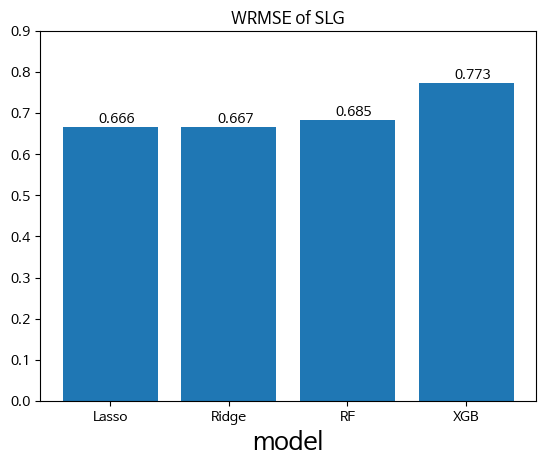

In [65]:
Lasso_SLG = SLG_linear_models['Lasso'].predict(SLG_test.iloc[:,-5:])
Ridge_SLG = SLG_linear_models['Ridge'].predict(SLG_test.iloc[:,-5:])
RF_SLG = SLG_RF_models['RF'].predict(SLG_test.iloc[:,-5:])
XGB_SLG = XGB_SLG_gridsearch.predict(SLG_test.iloc[:,-5:])

wrmse_score = [wrmse(SLG_test['SLG'],SLG_test['AB'], Lasso_SLG),
            wrmse(SLG_test['SLG'],SLG_test['AB'], Ridge_SLG),
            wrmse(SLG_test['SLG'],SLG_test['AB'], RF_SLG),
            wrmse(SLG_test['SLG'],SLG_test['AB'], XGB_SLG)]

x_lab = ['Lasso','Ridge','RF','XGB']
plt.bar(x_lab, wrmse_score)
plt.title('WRMSE of SLG')
plt.xlabel('model', fontsize=18)
plt.ylim(0,0.9)

# 막대그래프 위에 값을 표시
for i, v in enumerate(wrmse_score):
  plt.text(i-0.1, v + 0.01, str(np.round(v,3)))

plt.show()